# Logistic Regression Model

In [9]:
# Import libraries
import warnings;

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

warnings.filterwarnings("ignore")
sns.set()
sns.set_theme(style="whitegrid")

## Dataset

In [5]:
# Import dataset: dataset_logreg
df = pd.read_csv('dataset_logreg.csv')
df.head()

,age,duration_latest,count_call_current,days_last_campaign,count_call_previous,evr_quarterly,cpi_monthly,cci_monthly,type_employment,highest_educ,...,home_loan_Cat_1_u***n,home_loan_Cat_2_y***s,personal_loan_Cat_1_u***n,personal_loan_Cat_2_y***s,contact_medium_Cat_1_t***e,dow_last_contacted_Cat_1_m***n,dow_last_contacted_Cat_2_t***u,dow_last_contacted_Cat_3_t***e,dow_last_contacted_Cat_4_w***d,credit_facility_Cat_1_u***n
0,57,8.770292,0.000000,0,1,-1.8,92.893,-46.2,0.107585,0.109315,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,55,8.227745,0.554826,0,0,1.1,93.994,-36.4,0.102389,0.142857,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,33,5.142826,0.000000,0,1,-1.8,92.893,-46.2,0.069611,0.078053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,8.678318,0.904026,0,0,1.4,94.465,-41.8,0.129596,0.109315,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,27,7.418466,0.554826,0,0,1.4,93.918,-42.7,0.106548,0.109315,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Define features and target variable
X = df.drop('Response', axis=1)
y = df[['Response']]

# Ensure the target variable is binary
y = y.astype('int')

# Check the shape of the features and target variable
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Features shape: (34997, 25)
Target shape: (34997, 1)


## Modeling

In [10]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000, random_state=42)

## Evaluation

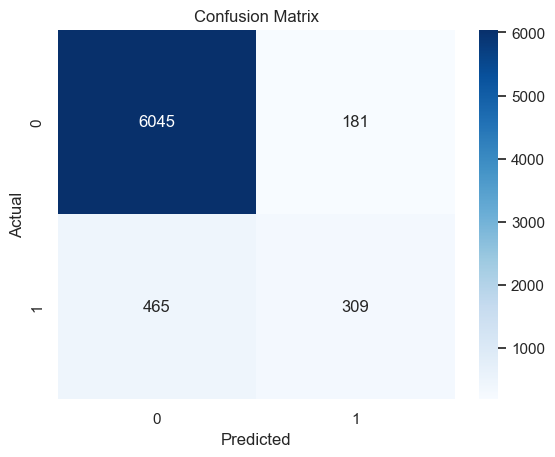

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6226
           1       0.63      0.40      0.49       774

    accuracy                           0.91      7000
   macro avg       0.78      0.69      0.72      7000
weighted avg       0.90      0.91      0.90      7000

ROC AUC Score: 0.9250
Accuracy Score: 0.9077


In [12]:
# Making predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

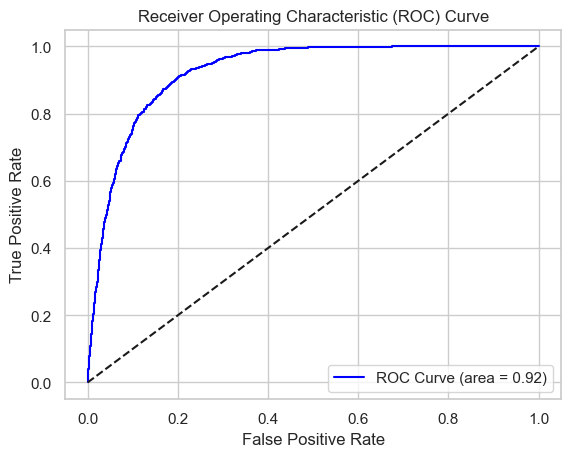

In [14]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()